In [83]:
import numpy as np
import pandas as pd
import os

In [84]:
df1=pd.read_csv("movieinfo/contentDataGenre.csv")
df2=pd.read_csv("movieinfo/contentDataPrime.csv")
df3=pd.read_csv("movieinfo/contentDataRegion.csv")

In [85]:
df1.head(1)

,dataId,genre
0,100000,Biography


In [86]:
df_dup1 = df1.duplicated('dataId', keep = False)
df_dup1.value_counts()

True     615
False     21
Name: count, dtype: int64

In [87]:
df1 = df1.drop_duplicates(subset='dataId')

In [88]:
(df1["genre"].value_counts()).shape # total no of genres

(9,)

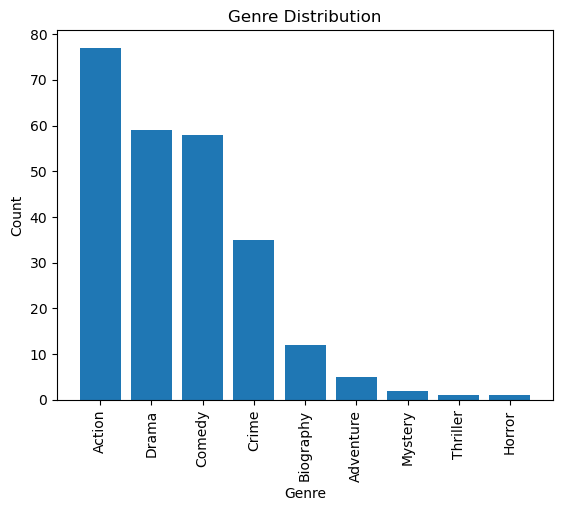

In [89]:
import matplotlib.pyplot as plt
genre_counts = df1["genre"].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Genre Distribution")
plt.show()

In [90]:
df2.head(1)

,dataId,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description
0,100000,movie,12th Fail,-1,2023,-1,-1,8.8,-1,NaN,The real-life story of IPS Officer Manoj Kumar...


In [91]:
df_dup1 = df2.duplicated('dataId', keep = False)
df_dup1.value_counts()

False    250
Name: count, dtype: int64

In [92]:
df2 = df2.drop_duplicates(subset ='dataId')

In [93]:
df2["gross"].value_counts()

gross
-1    250
Name: count, dtype: int64

In [94]:
df2["endYear"].value_counts()

endYear
-1    250
Name: count, dtype: int64

In [95]:
df2.drop(["endYear","gross"], axis=1, inplace=True)

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dataId       250 non-null    int64  
 1   contentType  250 non-null    object 
 2   title        250 non-null    object 
 3   length       250 non-null    int64  
 4   releaseYear  250 non-null    int64  
 5   votes        250 non-null    int64  
 6   rating       250 non-null    float64
 7   certificate  141 non-null    object 
 8   description  250 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 17.7+ KB


In [97]:
df2['certificate'].value_counts()

certificate
Not Rated    129
PG-13          4
PG             3
TV-14          3
Approved       1
TV-MA          1
Name: count, dtype: int64

In [98]:

df2.drop("certificate",axis=1,inplace=True)

In [99]:
df3.head(1)

,dataId,region
0,100000,India


In [100]:
df_dup1 = df3.duplicated('dataId', keep = False)
df_dup1.value_counts()
df3 = df3.drop_duplicates(subset ='dataId')

In [101]:
merged_df = pd.merge(df3, df1,how='inner', on='dataId')
df = pd.merge(merged_df, df2, how = 'inner', on='dataId')

In [102]:

df.head(1)

,dataId,region,genre,contentType,title,length,releaseYear,votes,rating,description
0,100000,India,Biography,movie,12th Fail,-1,2023,-1,8.8,The real-life story of IPS Officer Manoj Kumar...


In [103]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dataId       250 non-null    int64  
 1   region       250 non-null    object 
 2   genre        250 non-null    object 
 3   contentType  250 non-null    object 
 4   title        250 non-null    object 
 5   length       250 non-null    int64  
 6   releaseYear  250 non-null    int64  
 7   votes        250 non-null    int64  
 8   rating       250 non-null    float64
 9   description  250 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 19.7+ KB


In [104]:
df['length'] = pd.to_numeric(df['length'], errors='coerce')
df_filtered1 = df[(df['length'] <= 600) & (df['rating'] >= 8)]

In [105]:

df_filtered1

,dataId,region,genre,contentType,title,length,releaseYear,votes,rating,description
0,100000,India,Biography,movie,12th Fail,-1,2023,-1,8.8,The real-life story of IPS Officer Manoj Kumar...
1,100001,India,Comedy,movie,Gol Maal,-1,1979,-1,8.5,A man's simple lie to secure his job escalates...
2,100002,India,Crime,movie,Nayakan,-1,1987,-1,8.6,A common man's struggles against a corrupt pol...
3,100003,India,Adventure,movie,Anbe Sivam,-1,2003,-1,8.6,"Two men, one young and arrogant, the other dam..."
4,100004,India,Drama,movie,The World of Apu,-1,1959,-1,8.4,This final installment in Satyajit Ray's Apu T...
...,...,...,...,...,...,...,...,...,...,...
239,100239,India,Action,movie,Kaakha Kaakha,-1,2003,-1,8.0,"After a police team kills his brother, a drug-..."
240,100240,India,Comedy,movie,Oopiri,-1,2016,-1,8.0,"Impressed by his carefree attitude, quadripleg..."
241,100241,India,Action,movie,Thuppakki,-1,2012,-1,8.1,An army captain is on a mission to track down ...
244,100244,India,Action,movie,Pokiri,-1,2006,-1,8.0,A money-minded criminal has to deal with two r...


In [107]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Download required NLTK data (more comprehensive):
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Add this line
nltk.download('averaged_perceptron_tagger')  # Sometimes needed

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Apply cleaning function
df_filtered1['clean_plot'] = df_filtered1['description'].dropna().apply(clean_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/frankenstein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/frankenstein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/frankenstein/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/frankenstein/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/tmp/ipykernel_25135/2619716993.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['clean_plot'] = df_filtered1['description'].dropna().

In [108]:
def get_polarity_scores(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
sentiment_scores = df_filtered1['clean_plot'].apply(lambda x: pd.Series(get_polarity_scores(x)))
df_filtered1[['polarity', 'subjectivity']] = sentiment_scores

/tmp/ipykernel_25135/341608587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1[['polarity', 'subjectivity']] = sentiment_scores
/tmp/ipykernel_25135/341608587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1[['polarity', 'subjectivity']] = sentiment_scores


In [109]:
features = df_filtered1[['length','votes','rating','polarity', 'subjectivity']].dropna()

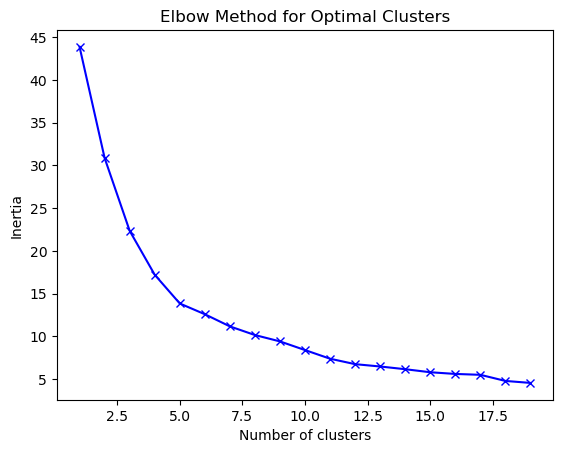

In [111]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 20)  # Adjust the range based on your data
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [112]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_filtered1['cluster'] = kmeans.fit_predict(features)

/tmp/ipykernel_25135/4145962962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['cluster'] = kmeans.fit_predict(features)


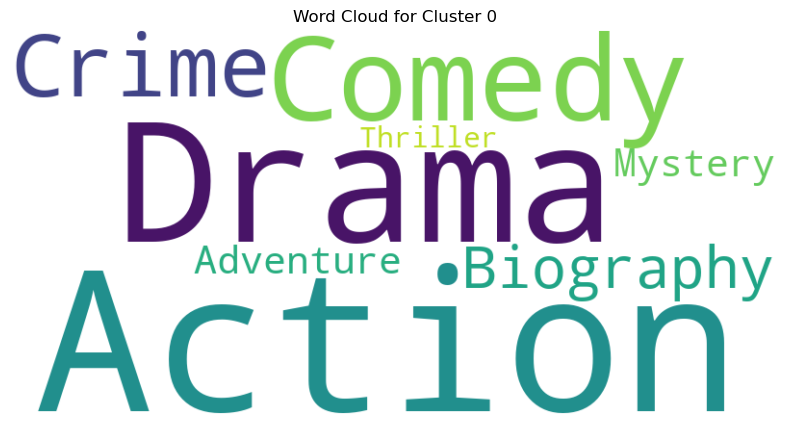

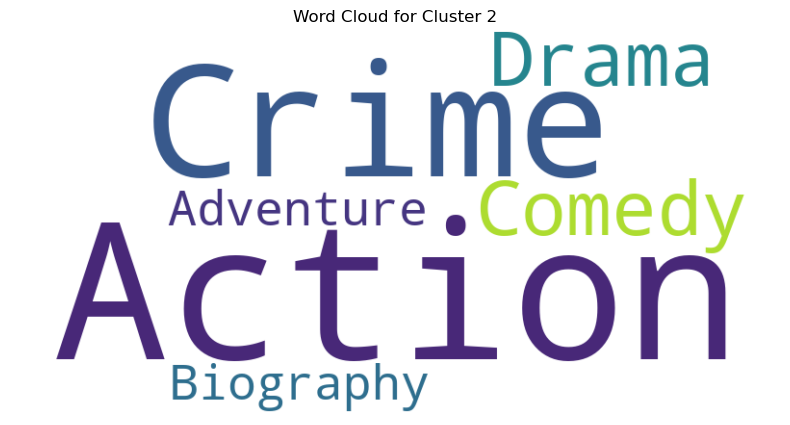

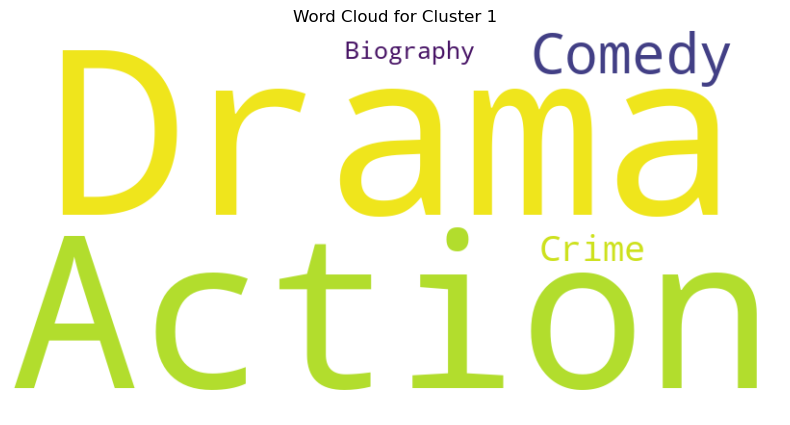

In [114]:
from wordcloud import WordCloud
def create_word_cloud(cluster_data, cluster_num):
    text = ' '.join(cluster_data['genre'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

# Create and display word clouds for each cluster
for cluster_num in df_filtered1['cluster'].unique():
    cluster_data = df_filtered1[df_filtered1['cluster'] == cluster_num]
    create_word_cloud(cluster_data, cluster_num)

In [115]:

cluster=df_filtered1.groupby(by=df_filtered1['cluster'])

In [116]:

df_filtered1=cluster.apply(lambda x: x.sort_values(["rating"],ascending=False))
df_filtered1.reset_index(level=0, inplace=True,drop=True)

/tmp/ipykernel_25135/2617143382.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered1=cluster.apply(lambda x: x.sort_values(["rating"],ascending=False))


In [117]:

df_filtered1.head()

,dataId,region,genre,contentType,title,length,releaseYear,votes,rating,description,clean_plot,polarity,subjectivity,cluster
24,100024,India,Comedy,movie,Mayabazar,-1,1957,-1,9.1,Balarama promises Subhadra to get his daughter...,balarama promises subhadra get daughter marrie...,-0.025000,0.175000,0
15,100015,India,Comedy,movie,Sandesham,-1,1991,-1,9.0,A satire on contemporary Kerala politics where...,satire contemporary kerala politics brothers t...,0.216667,0.391667,0
25,100025,India,Comedy,movie,Nadodikkattu,-1,1987,-1,8.8,"After losing their jobs in Kerala, Dasan and V...",losing jobs kerala dasan vijayan decide migrat...,0.000000,0.000000,0
21,100021,India,Drama,movie,Natsamrat,-1,2016,-1,8.8,"After he retires, an aging theatre actor and h...",retires aging theatre actor wife begin feel un...,0.000000,0.000000,0
0,100000,India,Biography,movie,12th Fail,-1,2023,-1,8.8,The real-life story of IPS Officer Manoj Kumar...,real life story ips officer manoj kumar sharma...,0.200000,0.300000,0


In [118]:
import pickle
file = open('dataset.pkl','wb')
pickle.dump(df_filtered1,file)

In [119]:
with open('dataset.pkl', 'rb') as f:
    df_filtered1 = pickle.load(f)
def recommend_movies(cluster_value):
    print('What do you want to see: Movie or TV series?')
    x=input()
    filtered_movies = df_filtered1[df_filtered1['cluster'] == cluster_value]
    if(x=='Movie'):
        top_movies = filtered_movies[filtered_movies['contentType']=='Movie'].head(10)
    else:
        top_movies = filtered_movies[filtered_movies['contentType']=='TV series'].head(10)

    top_movies = filtered_movies.head(10)  # Get the first 10 movies by index
    return top_movies[['dataId', 'title']]

In [120]:
# example usage:0 - Happy,joy,love ; 1- Sad,fear,anger ; 2- neutral,disguist,surprise
recommended_movies = recommend_movies(1)
print(recommended_movies)

What do you want to see: Movie or TV series?
     dataId                        title
7    100007                        #Home
36   100036         Nuvvu Naaku Nachchav
14   100014            C/o Kancharapalem
134  100134    A Northern Story of Valor
125  100125            Thoovanathumbikal
29   100029                   Thalapathi
22   100022                   Drishyam 2
37   100037           Jaane Bhi Do Yaaro
46   100046                Chupke Chupke
51   100051  Agent Sai Srinivasa Athreya
